# Bias y Varianza

In [55]:
from random import choice
import matplotlib.pyplot as plt
import numpy as np

La funcion que vamos a aproximar por medio de dos hipotesis (constante y lineal) es $\sin(\pi x)$, por lo que necesitaremos generar algunos puntos y calcular su imagen con dicha funcion.

In [56]:
N_total=1000
x = np.linspace(-1, 1, N_total)
y = np.sin(np.pi * x)

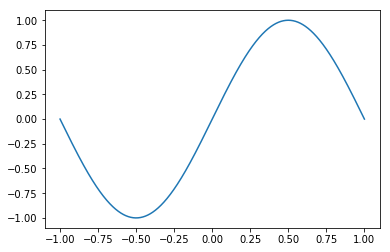

In [57]:
plt.plot(x,y)
plt.show()

## Hipótesis 1 (Función constante $f(x)=c$ )

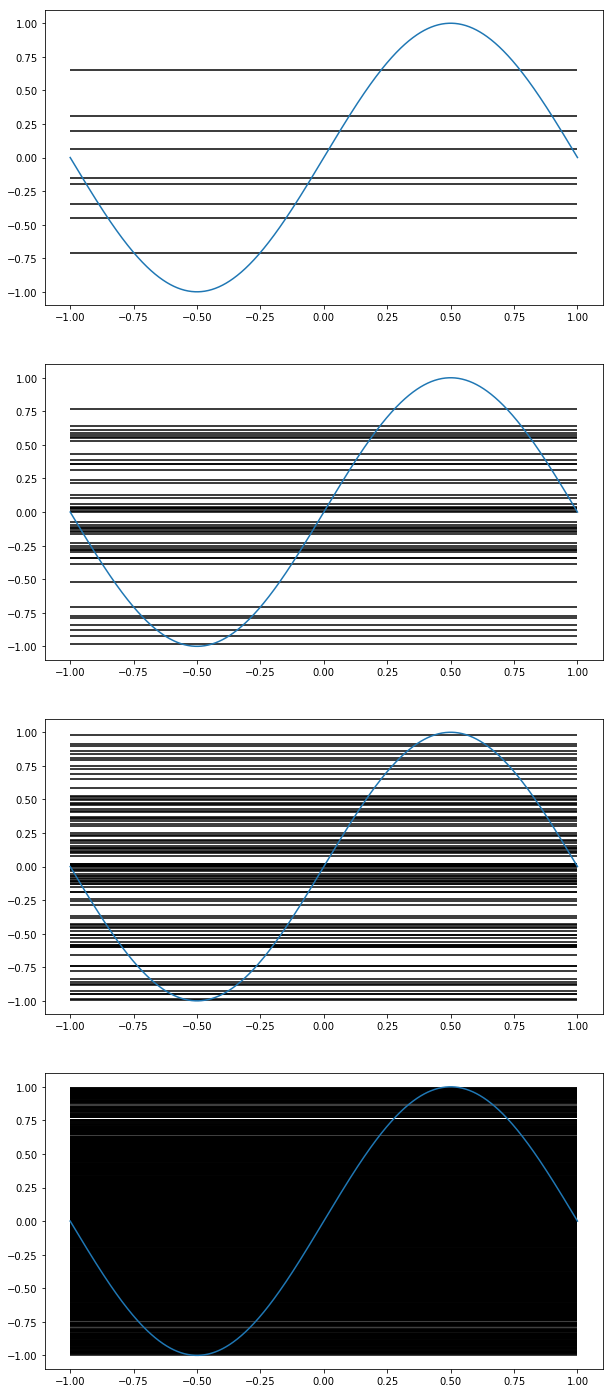

In [98]:
N = [10, 50, 100, 1000] # cantidad de puntos

mediasH1=[]
H1s=[]

fig, ax = plt.subplots(len(N),1,figsize=(10,25))

for graph,n in enumerate(N):
    
    index=[random.choice(range(N_total)) for _ in range(n)]
    x1=x[index]
    y1=y[index]
    H1 = [(y1[i] + y1[i + 1]) / 2 for i in range(n-1)] #Escogemos el punto medio
    
    ax[graph].plot(x, y)
    for i in range(n-1):
        ax[graph].hlines(H1[i], xmax=1, xmin=-1)
        
    mediasH1.append(np.mean(H1))
    H1s.append(H1)
        
plt.show()

## Hipótesis 2 (Función lineal $f(x) = mx +b $ )

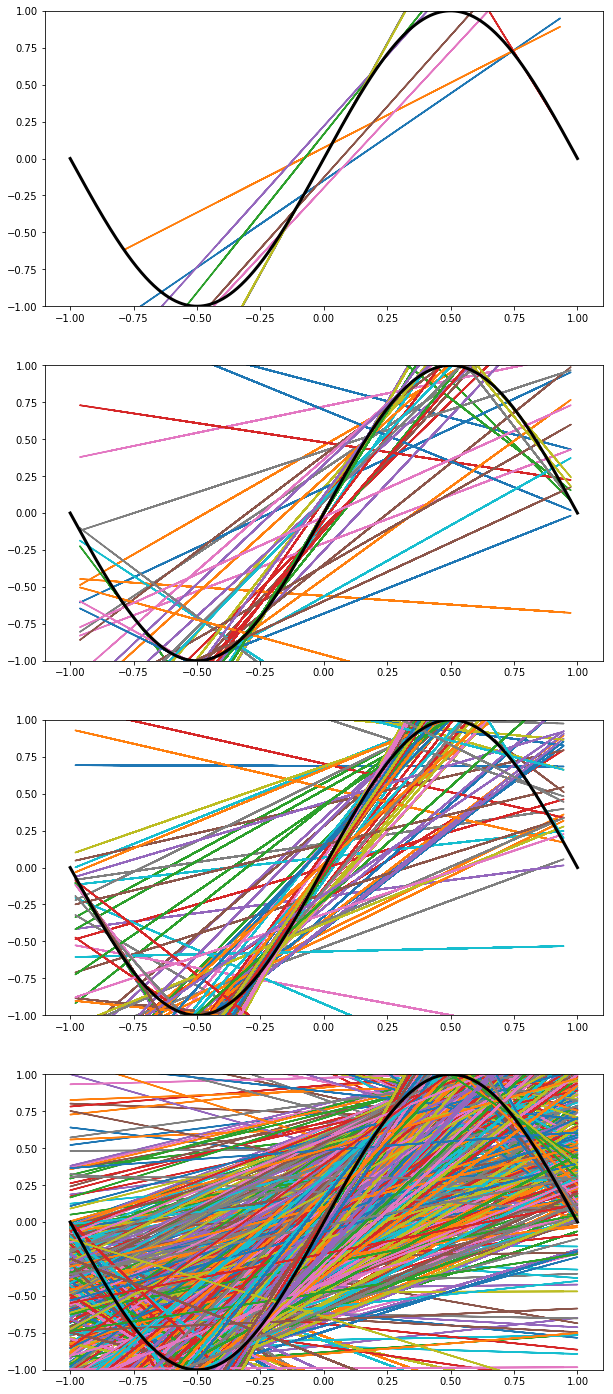

In [99]:
mediasH2=[]
H2s=[]

fig, ax = plt.subplots(len(N),1,figsize=(10,25))

for graph,n in enumerate(N):
  
    index1=[random.choice(range(N_total)) for _ in range(n)]
    index2=[random.choice(range(N_total)) for _ in range(n)]
    
    x1= x[index1]
    
    p1=[(x[i],y[i]) for i in index1]
    p2=[(x[i],y[i]) for i in index2]

    
    m = [(p2_[1] - p1_[1]) / (p2_[0] - p1_[0]) for p1_, p2_ in zip(p1,p2)] #m = (y2-y1) / (x2-x1)
    
    b = [p_[1] - m_*p_[0] for p_, m_ in zip(p1,m)] #y=mx + b ---> b=y-mx
    
    
    ax[graph].set_ylim(-1, 1)
    
    for i in range(n-1):
        H2= m[i]*x1 + b[i]
        ax[graph].plot(x1, H2)
        
    ax[graph].plot(x, y,'k-',linewidth=3.0)
    mediasH2.append((np.mean(m), np.mean(b)))
    H2s.append(H2)

        
plt.show()

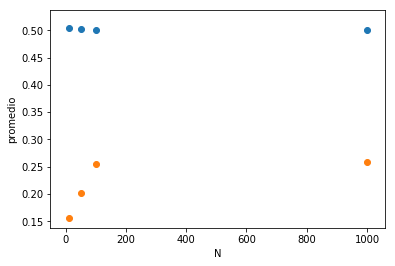

In [109]:
bias = [np.mean((y - h1)**2) for h1 in mediasH1]
variance = [np.mean(np.var(h1)) for h1 in H1s ]


fig, ax = plt.subplots()

plt.xlabel('N')
plt.ylabel('promedio')
ax.scatter(N, bias, label='Sesgo')
ax.scatter(N, variance, label='Varianza')

plt.show()

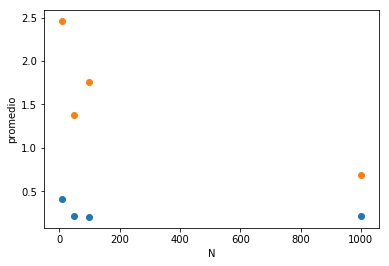

In [110]:
bias = [np.mean((y - (m*x+b))**2) for m,b in mediasH2]
variance = [np.mean(np.var(h1)) for h1 in H2s ]

fig, ax = plt.subplots()

plt.xlabel('N')
plt.ylabel('promedio')
ax.scatter(N, bias, label='Sesgo')
ax.scatter(N, variance, label='Varianza')

plt.show()